In [1]:
import csv
import copy
import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
data = pd.read_csv('~/PycharmProjects/NuclearOrientation/Data/OrientationData.tsv',
                   delimiter="\t",
                   skiprows=0,
                   usecols=['Name', 'Center X TUMOR', 'Center Y TUMOR', 'Orientation re Horizontal TUMOR'],
                   dtype=str)
data.dropna(axis='rows', inplace=True)
a = data.to_numpy()

In [3]:
from Funcs.DataSortDist import data_sort_dist
from Funcs.DataSortOrient import data_sort_orient

# This step adds the relevant values to both dictionaries
data_structure = {}
data_orient = {}
for row in a:
    data_sort_dist(row, data_structure)
    data_sort_orient(row, data_orient)

In [5]:
data1 = pd.read_csv('~/PycharmProjects/NuclearOrientation/Data/VisiopharmAnalysisData_02-22.csv',
                     delimiter=",", skiprows=0, usecols=[1]).to_numpy()
data2 = pd.read_csv('~/PycharmProjects/NuclearOrientation/Data/VisiopharmAnalysisData_02-22.csv',
                     delimiter=",", skiprows=0, usecols=[4], dtype=int).to_numpy()
data3 = pd.read_csv('~/PycharmProjects/NuclearOrientation/Data/VisiopharmAnalysisData_02-22.csv',
                     delimiter=",", skiprows=0, usecols=[1, 2, 27], dtype=str).to_numpy().reshape((-1, 3))
x = 0
y = 0
y_list = []
for slide in data1[:, [0]]:
    slide = str(slide)
    if slide[7] == "1":  # CHANGE THIS ONE BRO
        data1[x, 0] = slide[9:11] + ", " + slide[12:15]
        x += 1
        y_list.append(y)
        y += 1
    else:
        x += 1
        y += 1

data1 = data1[y_list, :].T
data1 = data1[0].tolist()
data2 = data2[y_list]

distances_angles = [(math.pi)/12, (20*math.pi)/180, (25*math.pi) /
                    180, (math.pi)/6, (35*math.pi)/180, (40*math.pi)/180]
id = list(data3[y_list, 1].astype("int"))
cnt = list(data3[y_list, -1].astype("int"))
location = list(data3[y_list, 0])


In [6]:
weight = 1.5

In [7]:
from Funcs.DictMatricesOrient import dict_matrices_orient
from Funcs.FindMaxDistance import find_max_distance
from Funcs.DictMatricesDist import dict_matrices_dist

min_distance = distances_angles[1]
slide = "(A, 01)"

matrix_orient = dict_matrices_orient(data_orient, min_distance, slide)
min_distance_dist = weight*find_max_distance(data_structure[slide][:, :])
matrix_dist = dict_matrices_dist(data_structure, min_distance_dist, slide)

In [8]:
graph1 = nx.from_numpy_matrix(matrix_dist)


In [9]:
graph2 = nx.from_numpy_matrix(matrix_orient)


In [10]:
i = 0
y = 0

shape = matrix_dist.shape
values = data_structure[slide][:, [0, 1]]

rane = range(0, shape[0])
dict_x_y = {}
for key in rane:
    dict_x_y[key] = tuple(values[key, :])
#print(dict_x_y)
new_matrix = np.zeros(shape)

for row in matrix_dist:
    #print(row)
    y = 0
    for element in row:
        #print(element)
        if element != 0.:
            new_matrix[i, y] = matrix_orient[i, y]
        y += 1
    i += 1


In [11]:
new_matrix = np.matrix(new_matrix)
matrix_data = new_matrix
matrix1 = copy.deepcopy(new_matrix)
num = np.sum(np.sum(matrix_data, axis=1), axis=0)
#denum = np.sum(np.sum((matrix_data != 0), axis = 1) != 0, axis = 0)
denum = np.sum(np.sum(np.ceil(matrix1), axis=1), axis=0)
avg_node_len = num/denum
print("Data: \n")
print(f"Average node length: {avg_node_len}")
print()


Data: 

Average node length: [[0.61360661]]



In [12]:
new_matrix = np.matrix(new_matrix)
n = new_matrix.shape[0]
list_colors = []
cmap = sns.color_palette("viridis_r", as_cmap=True)


#cmap = sns.color_palette("magma_r", as_cmap=True)
# for i in range(cmap.N):
#    rgba = cmap(i)
#    print("Hexadecimal representation of rgba:{} is {}".format(
#        rgba, matplotlib.colors.rgb2hex(rgba)))
# print(type(list_colors))
#print(list(list_colors))
# for i in range(n):
#     r = random.randint(0, 225)/255
#     g = random.randint(0, 255)/255
#     b = random.randint(0, 255)/255
#     rgb = [r, g, b]
#     if rgb not in list_colors:
#         list_colors.append(rgb)
#print(list_colors)
graph = nx.from_numpy_matrix(new_matrix)
connected = nx.connected_components(graph)
lst = list(connected)

maxList = max(lst, key=len)
maxLength = max(map(len, lst))
#print(maxLength)

#print(list(connected))

#print(colors)
# for i in range(n):
#     r = random.randint(0, 225)/255
#     g = random.randint(0, 255)/255
#     b = random.randint(0, 255)/255
#     rgb = [r, g, b]
#     if rgb not in list_colors:
#         list_colors.append(rgb)


In [13]:

colors = [0] * n
for dic in lst:
    dec = len(dic)/maxLength
    #dec = len(dic)/n
    color = cmap(dec)
    for val in dic:
        colors[val] = color


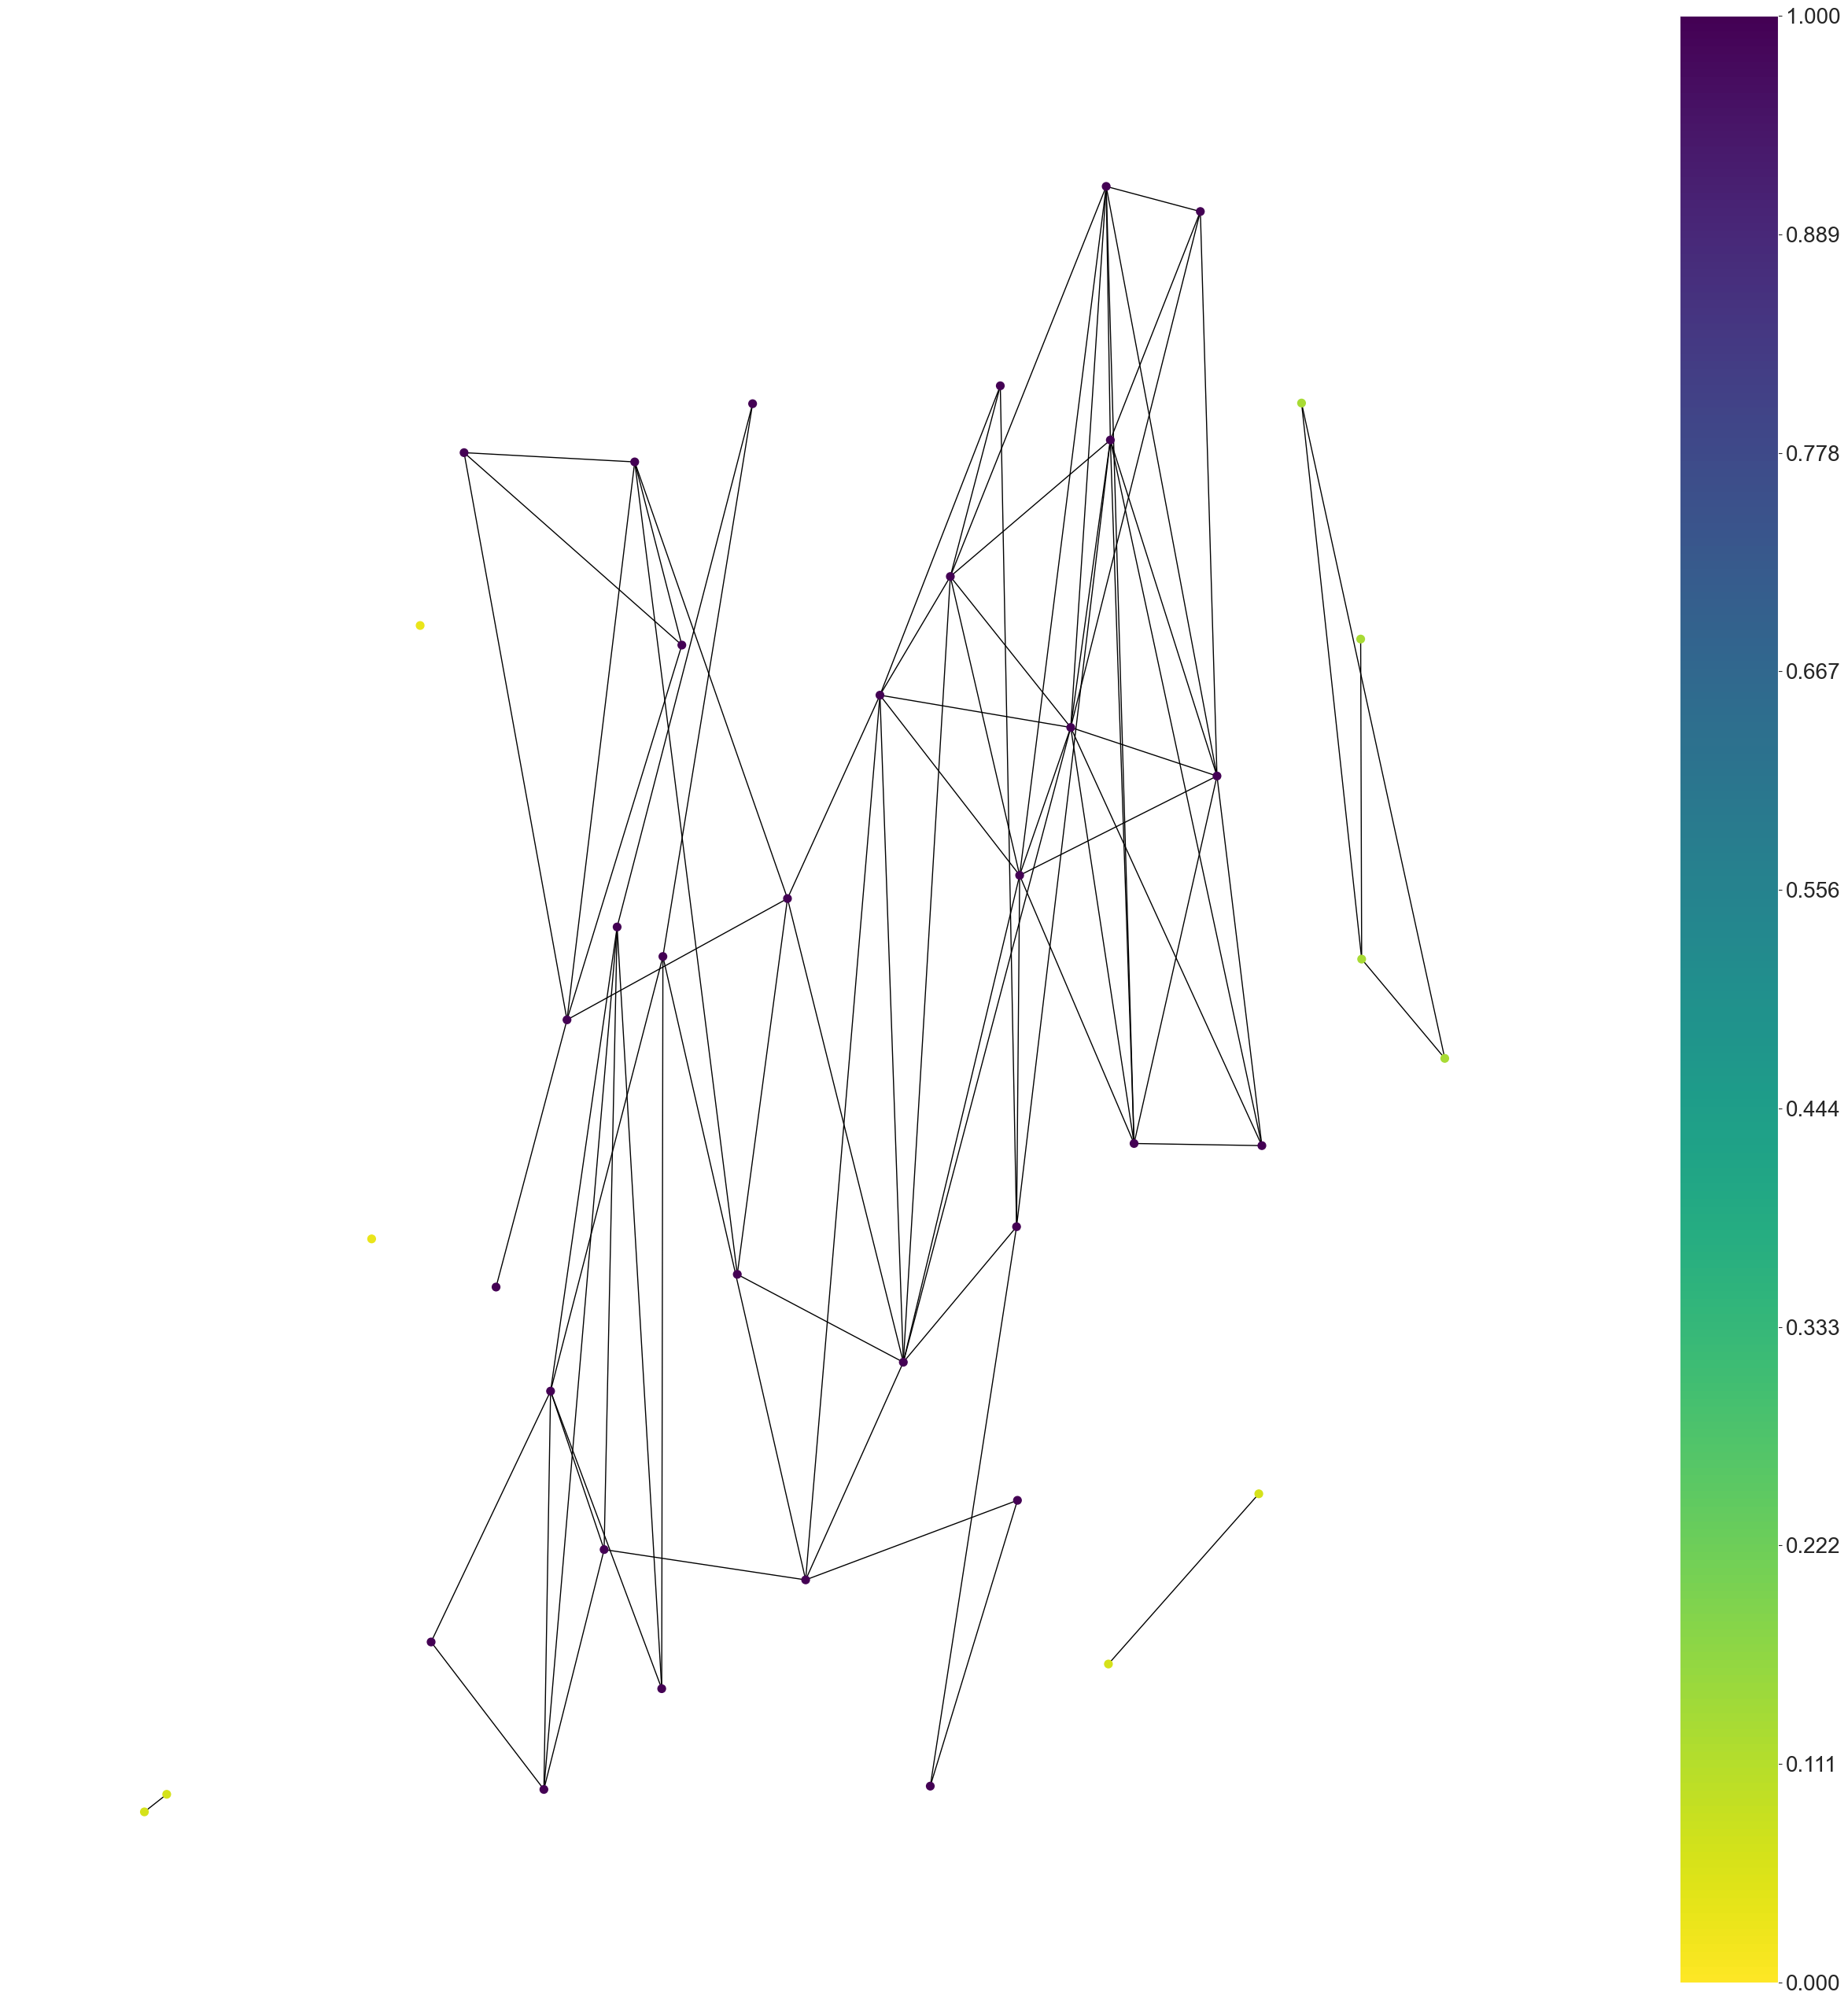

In [14]:

norm = mpl.colors.Normalize(vmin=0, vmax=1)

# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


plt.figure(3, figsize=(25, 25))
nx.draw(graph, node_size=50, pos=dict_x_y,
        with_labels=False, node_color=colors)  # "#A020F0"

cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, 10))
cbar.ax.tick_params(labelsize=20)
plt.show()


In [15]:
#outer_array = []
uni_dex = 0
for slide in data1:
    inner_list = []
    for min_ang_distance in distances_angles:
        #print(min_distance)

        min_distance_dist = weight *find_max_distance(data_structure[slide][:, :])

        matrix_dist = dict_matrices_dist(data_structure, min_distance_dist, slide)

        matrix_orient = dict_matrices_orient(data_orient, min_ang_distance, slide)

        #matrix_dist
        graph1 = nx.from_numpy_matrix(matrix_dist)

        #matrix_orient
        graph2 = nx.from_numpy_matrix(matrix_orient)

        i = 0
        y = 0

        shape = matrix_dist.shape
        values = data_structure[slide][:, [0, 1]]

        rane = range(0, shape[0])
        dict_x_y = {}
        for key in rane:
            dict_x_y[key] = tuple(values[key, :])
        #print(dict_x_y)
        new_matrix = np.zeros(shape)

        for row in matrix_dist:
            #print(row)
            y = 0
            for element in row:
                #print(element)
                if element != 0.:
                    new_matrix[i, y] = matrix_orient[i, y]
                y += 1
            i += 1

        new_matrix = np.matrix(new_matrix)
        matrix_data = new_matrix
        matrix1 = copy.deepcopy(new_matrix)
        num = np.sum(np.sum(matrix_data, axis=1), axis=0)
        denum = np.sum(np.sum(np.ceil(matrix1), axis=1), axis=0)
        avg_node_len = num/denum

        graph = nx.from_numpy_matrix(new_matrix)
        connected = nx.connected_components(graph)
        lst = list(connected)


        min_proper_size = 3

        #### PSg_A_D1.5

        # creates a list of values greater than the proper subgraph size [[len, array(all nuclei indexs)],...]
        proper_sizes = [[len(g)] for g in sorted(
            nx.connected_components(graph), key=len) if len(g) > min_proper_size]

        #print(proper_sizes)

        just_proper_sizes = len(proper_sizes)
        #print(just_proper_sizes)

        #### TSg_A_D1.5

        # creates a list of values greater than the subgraph size [[len, array(all nuclei indexs)],...]
        total_sizes = [[len(g)] for g in sorted(
            nx.connected_components(graph), key=len)]
        # creates a list of all subgraphs [len, len, len,....]
        just_total_sizes = len(total_sizes)

        #### ND_15_D1.5

        # creates the output rows in a 2 d matrix = [[nuceli index, degree],...]
        d = np.array(graph.degree).astype(int)

        number_nuc = d.shape[0]
        grand_mean = np.mean(d[:, 1])  # ND_15_D1.5

        #### NLSg_15_D1.5

        max_SG_size = np.max(total_sizes)

        #### CL_15_D1.5

        connection_strength = float(avg_node_len)
        inner_list = copy.deepcopy(inner_list)
        inner_list.extend([just_total_sizes, just_proper_sizes,
                          max_SG_size, grand_mean, connection_strength])

        #print(inner_list)

    #print(inner_list)
    id_use = id[uni_dex]
    cnt_use = cnt[uni_dex]
    location_use = location[uni_dex]
    grade = data2[uni_dex]

    # double check this before full impl
    combined_list = [location_use, id_use, cnt_use, grade]
    #print(combined_list)
    combined_list.extend(inner_list)
    #print(combined_list)
    #combined_list = np.array(combined_list, dtype = str)
    with open('outfile5_test.csv', 'a+') as f:
        write = csv.writer(f)
        write.writerow(combined_list)

    # with open("test_aidan.csv", "a", newline="") as f:
    #     np.savetxt(f, combined_list, fmt = "%s", delimiter=',', newline='\n')

    uni_dex += 1


KeyError: '(A, 03)'